In [1]:
import numpy as np
import sympy as sy
import scipy as sc
import matplotlib.pyplot as plt

# Construct Hamiltonian of 1D Chain

$$ H=-\sum_{i}(S_{i}^{z})^{2} -\lambda\sum_{<i,j>} \vec{S}_{i} \cdot \vec{S}_{j}$$
Note that it is not the real Hamiltonian but only with a coefficient difference. 

Simply, for the two-spins case, 
$$ H=-(S_{1}^{z})^{2}-(S_{2}^{z})^{2} +\lambda \vec{S}_{1} \cdot \vec{S}_{2}$$
or
$$ H=-(S_{1}^{z})^{2}-(S_{2}^{z})^{2} +\lambda(S_{1}^{z}S_{2}^{z}+S_{1}^{x}S_{2}^{x}+S_{1}^{y}S_{2}^{y})$$

### Spin operators

In [17]:
def de(a, b):
    if a == b:
        return 1
    else:
        return 0
    
def Spin_x(s):
    '''
    This function returns the spin-x operator corresponding to spin number s (natural units, hbar=1)
    '''
    d = 2*s+1
    Sx = np.zeros([d, d])
    
    def sx_element(i, j):
        return 1/2 * (de(i, j+1)+de(i+1, j)) * np.sqrt((s+1)*(i+1+j+1-1)-(i+1)*(j+1))
    
    for i in range(0, d):
        for j in range(0, d):
            Sx[i, j] += sx_element(i, j)
    
    return Sx
    
def Spin_y(s):
    '''
    This function returns the spin-y operator corresponding to spin number s (natural units, hbar=1)
    '''
    d = 2*s+1
    Sy = np.zeros([d, d], dtype='complex')
    
    def sy_element(i, j):
        return 1j/2 * (de(i, j+1)-de(i+1, j)) * np.sqrt((s+1)*(i+1+j+1-1)-(i+1)*(j+1))
    
    for i in range(0, d):
        for j in range(0, d):
            Sy[i, j] += sy_element(i, j)
    
    return Sy

def Spin_z(s):
    '''
    This function returns the spin-z operator corresponding to spin number s (natural units, hbar=1)
    '''
    
    d = 2*s+1
    Sz = np.zeros([d, d])
    
    def sz_element(i, j):
        return de(i, j) * (s+1-(j+1))
    
    for i in range(0, d):
        for j in range(0, d):
            Sz[i, j] += sz_element(i, j)
    
    return Sz

array([[0.+0.j        , 0.-0.70710678j, 0.+0.j        ],
       [0.+0.70710678j, 0.+0.j        , 0.-0.70710678j],
       [0.+0.j        , 0.+0.70710678j, 0.+0.j        ]])

### Class for 1D Chain

In [3]:
class OneD_Chain():
    '''This class describes the 1D chain lattice'''

    def __init__(self, N, spin, lamb, periodic):
        '''
        N: number of sites
        spin: spin number
        lamb: strenth of spin coupling
        '''
        self.N = N
        self.spin = spin
        self.lamb = lamb
        self.periodic = periodic
        self.H = self.Hamiltonian()

    
    ############################################# Spin operator#############################################
    
    def de(a, b):
    if a == b:
        return 1
    else:
        return 0
    
    def Spin_x(s):
        '''This function returns the spin-x operator corresponding to spin number s (natural units, hbar=1)'''
        
        d = 2*s+1
        Sx = np.zeros([d, d])

        def sx_element(i, j):
            return 1/2 * (de(i, j+1)+de(i+1, j)) * np.sqrt((s+1)*(i+1+j+1-1)-(i+1)*(j+1))

        for i in range(0, d):
            for j in range(0, d):
                Sx[i, j] += sx_element(i, j)

        return Sx

    def Spin_y(s):
        '''This function returns the spin-y operator corresponding to spin number s (natural units, hbar=1)'''
        
        d = 2*s+1
        Sy = np.zeros([d, d], dtype='complex')

        def sy_element(i, j):
            return 1j/2 * (de(i, j+1)-de(i+1, j)) * np.sqrt((s+1)*(i+1+j+1-1)-(i+1)*(j+1))

        for i in range(0, d):
            for j in range(0, d):
                Sy[i, j] += sy_element(i, j)

        return Sy
    
    def Spin_z(s):
        '''
        This function returns the spin-z operator corresponding to spin number s (natural units, hbar=1)
        '''

        d = 2*s+1
        Sz = np.zeros([d, d])

        def sz_element(i, j):
            return de(i, j) * (s+1-(j+1))

        for i in range(0, d):
            for j in range(0, d):
                Sz[i, j] += sz_element(i, j)

        return Sz
    #######################################################################################################
    
    
    
    def Hamiltonian(self):
        '''
        This function express the Hamiltonian of this 1D Chain lattice
        '''
        d = 2*self.spin + 1 # The dimension of Hamiltonian at each site
        
        Sx = self.Spin_x(self.spin)
        Sy = self.Spin_y(self.spin)
        Sz = self.Spin_y(self.spin)
        
        #The part of on-site Hamiltonian
        H_on = np.zeros([d**2, d**2])
        for i in range(1, self.N +1):
            H_on -= np.kron( np.identity(d**(i-1)) , np.kron(Sz.dot(Sz), np.identity(d**(self.N-i))) )
        
        #The part of exchange effect
        H_ex = np.zeros([d**2, d**2])
        
        if self.periodic == 'No':
            for i in range(1, self.N):
                H_ex += np.kron(np.identity(d**(i-1)), np.kron(Sz, np.identity(d**(self.N-i))) ).dot(\
                        np.kron( np.kron(np.identity(d**i), Sz), np.identity(d**(self.N-i-1))  )) 
                H_ex += np.kron(np.identity(d**(i-1)), np.kron(Sx, np.identity(d**(self.N-i))) ).dot(\
                        np.kron( np.kron(np.identity(d**i), Sx), np.identity(d**(self.N-i-1))  ))
                H_ex += np.real(\
                        np.kron(np.identity(d**(i-1)), np.kron(Sy, np.identity(d**(self.N-i))) ).dot(\
                        np.kron( np.kron(np.identity(d**i), Sy), np.identity(d**(self.N-i-1))  )))
        
        return H_on + self.lamb* H_ex
            
    def diagonalize(self, plot):
        '''This function gives the eigenvalues of H and the corresponding eigenvectors'''
        P, D = np.linagle.eig(self.H)
        
        return P, D
    
    def spectrum_plot(self, lamb, dL=0.001):
        '''It plots the eigenvalue spectrum of H in the range of lamb'''
        
        L = np.linspace(lamb[0], lamb[-1], num=round((lamb[-1]-lamb[0])/dL))
        
        P, D = np.linalg.eigh(Model.H)
        P_save = np.sort(P)

        for lamb in L[1:]:

            (P, D) = np.linalg.eigh(Model.H)
            P_save = np.vstack([P_save, np.sort(P)])

        P_save = np.transpose(P_save)
        return P_save
    
    def perturb(self):
        '''
        '''
        return 'retulst'
    
    def spectrum():
        '''
        '''
        
        return 'results'

## Three trial examples for intuition

In [4]:
Model_0 = Chain(N=2, spin=1, lamb=0, periodic='No')
P_0, D_0 = np.linalg.eig(Model_0.H)

In [5]:
P_0

array([-2., -1., -2., -1.,  0., -1., -2., -1., -2.])

In [6]:
np.around(D_0, decimals=3)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [7]:
Model_1 = Chain(N=2, spin=1, lamb=0.1, periodic='No')

In [8]:
A=Model_1.H
A

array([[-1.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -1. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -2.1,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.1,  0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0.1,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -1. ,  0. ,  0.1,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.1,  0. , -2.1,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0. , -1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1.9]])

In [9]:
np.diag(A)

array([-1.9, -1. , -2.1, -1. ,  0. , -1. , -2.1, -1. , -1.9])

In [10]:
P, D = np.linalg.eig(A)

In [11]:
P

array([-0.9       , -1.1       ,  0.00948101, -2.1       , -2.10948101,
       -0.9       , -1.1       , -1.9       , -1.9       ])

In [12]:
np.around(D, decimals=3)

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.707,  0.707,  0.   ,
         0.   ],
       [ 0.   ,  0.   , -0.047, -0.707,  0.706,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.707, -0.707,  0.   ,
         0.   ],
       [ 0.   ,  0.   , -0.998, -0.   , -0.067,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.707, -0.707,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   , -0.047,  0.707,  0.706,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.707,  0.707,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         1.   ]])

In [13]:
Model_2 = Chain(N=2, spin=1, lamb=0.09, periodic='No')

In [14]:
B = Model_2.H
P2,D2=np.linalg.eig(B)

In [15]:
P2

array([-1.09      , -0.91      , -0.91      , -1.09      ,  0.00772266,
       -2.09772266, -2.09      , -1.91      , -1.91      ])

In [16]:
np.around(D2, decimals=3)

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ],
       [ 0.   , -0.641, -0.63 , -0.681,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.043,  0.706, -0.707,  0.   ,
         0.   ],
       [-0.   , -0.641, -0.63 ,  0.681,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.998, -0.061,  0.   ,  0.   ,
         0.   ],
       [ 0.707, -0.3  ,  0.32 ,  0.191,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.043,  0.706,  0.707,  0.   ,
         0.   ],
       [-0.707, -0.3  ,  0.32 , -0.191,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         1.   ]])

\
It is not so nice that the NumPy outputs these eigenvalues in a non-sorted sequence, and it looks like they need to be sorted first.
\
By the way, interestingly, I made a mistake when I write minus before coupling term, the eigenstates makes no difference compared to the plus case.
## The variation of eigenvalues

In [17]:
def spectrum(N=2, spin=1, lamb=[0, 0.1], dL=0.001, periodic='No'):
    '''
    It gives the plotting of E(lambda)
    '''
    L = np.linspace(lamb[0], lamb[1], num=round((lamb[1]-lamb[0])/dL))
    
    Model = Chain(N=N, spin=spin, lamb=0, periodic=periodic)
    (P, D) = np.linalg.eigh(Model.H)
    P_save = np.sort(P)
    
    for lamb in L[1:]:
        Model = Chain(N=N, spin=spin, lamb=lamb, periodic=periodic)
        (P, D) = np.linalg.eigh(Model.H)
        P_save = np.vstack([P_save, np.sort(P)])
    
    P_save = np.transpose(P_save)
    return P_save

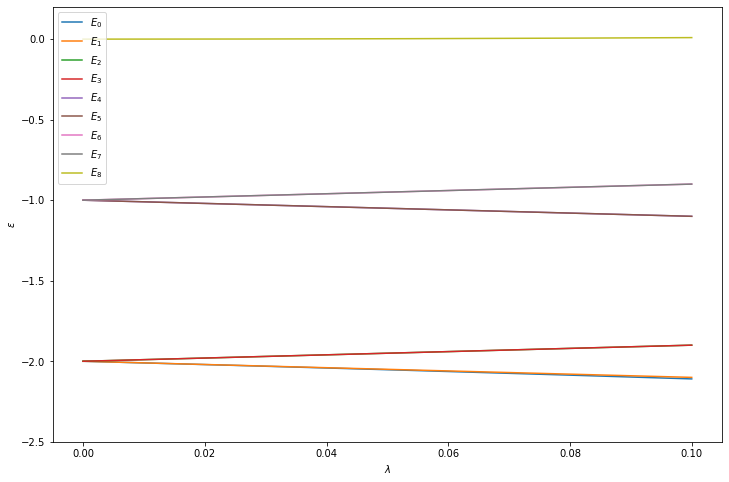

In [18]:
energy_spectrum = spectrum(dL=0.0001)
L = np.linspace(0, 0.1, num=1000)
plt.figure(figsize=(12,8))
i = 0
for D in energy_spectrum:
    plt.plot(L, D, label='$E_{}$'.format(i))
    i+=1
plt.legend(loc='best')
plt.xlabel('$\lambda$')
plt.ylabel('$\epsilon$')
plt.ylim(-2.5, 0.2, 0.01)
plt.savefig('ExactSolution.png')
plt.show()

#### Description
This is the exact solution of energy spectrum of two-spins coupling system. 
It look like there are four groups of two-degeneracy. However, we can actually distinguish slightly difference between them. My guess now is if in the view of second-order approximation, they are accurately degenerate. 

### Only the degenerate cases

In [19]:
def spectrum2(N=2, spin=1, lamb=[0, 0.1], dL=0.001, periodic='No'):
    '''
    It gives the plotting of E(lambda)
    '''
    L = np.linspace(lamb[0], lamb[1], num=round((lamb[1]-lamb[0])/dL))
    
    Model = Chain(N=N, spin=spin, lamb=0, periodic=periodic)
    (P, D) = np.linalg.eigh(Model.H)
    P_save = np.sort(P)[0:7]
    
    for lamb in L[1:]:
        Model = Chain(N=N, spin=spin, lamb=lamb, periodic=periodic)
        (P, D) = np.linalg.eigh(Model.H)
        P_save = np.vstack([P_save, np.sort(P)[0:7]])
    
    P_save = np.transpose(P_save)
    return P_save

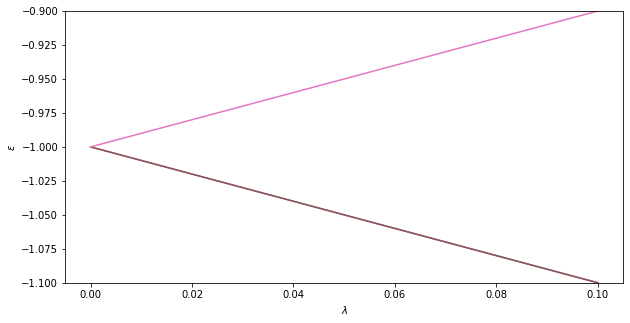

In [20]:
energy_spectrum2 = spectrum2(dL=0.0001)
L = np.linspace(0, 0.1, num=1000)

plt.figure(figsize=(10,5))
i = 0
for D in energy_spectrum2:
    plt.plot(L, D, label='$E_{}$'.format(i))
    i+=1
#plt.legend(loc='best')
plt.xlabel('$\lambda$')
plt.ylabel('$\epsilon$')
plt.ylim(-1.1, -0.9)
plt.savefig('Middle part.png')
plt.show()

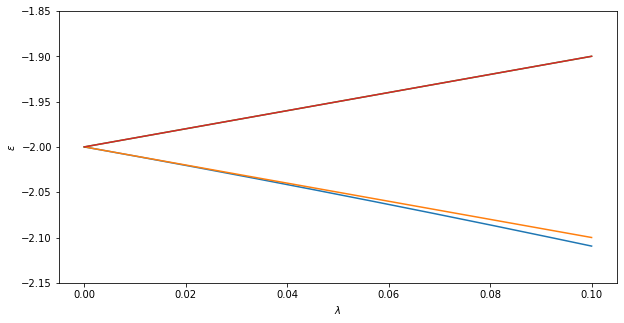

In [21]:
plt.figure(figsize=(10,5))
for D in energy_spectrum2:
    plt.plot(L, D)
#plt.legend(loc='best')
plt.xlabel('$\lambda$')
plt.ylabel('$\epsilon$')
plt.ylim(-2.15, -1.85)
plt.savefig('GroundState.png')
plt.show()

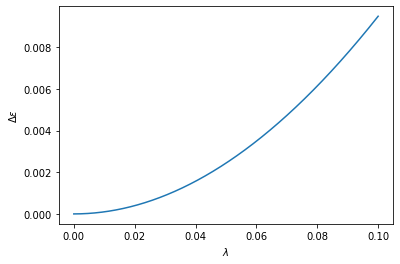

In [22]:
plt.plot(L, energy_spectrum2[1]-energy_spectrum2[0])
plt.xlabel('$\lambda$')
plt.ylabel('$\Delta\epsilon$')
plt.savefig('E1minusE0.png')

In [31]:
p = np.polyfit(L, energy_spectrum2[1]-energy_spectrum2[0], 5)
p

array([ 5.38676605e-01, -2.39187174e-01, -5.00601033e-01,  1.00001536e+00,
       -1.55314196e-07,  3.69728431e-10])

It is interesting that the ground state is not degenerate again! The ground energy at point '$\lambda=0.1$' is about -2.1095. The correction -0.1 should be from first order correction. By $\lambda^{2}=0.01$, it is likely that the '-0.0095' bias comes from higher order correction.

# Application of the perturbatioin theory

Note that the perturbation theory, the Hamiltonian was divided to two parts(unperturbed and perturbed):
$$ H = H_{0} + \lambda V$$
We will study this in the eigenbasis of $H_{0}$ with:
$$ H_{0}\left | \phi_{n}^{(0)} \right \rangle = E_{n}^{(0)} \left | \phi_{n}^{(0)} \right \rangle$$
The matrix representation of this set of vectors and the corresponding eigenvalues have been obtained in the previous Model_0. Now we list them in an ascending eigenvalues order. 

In [15]:
Phi0 = np.array([[0,0,1,0,0,0,0,0,0],  # ground state
                 [0,0,0,0,0,0,1,0,0],  # First excited state
                 [0,0,0,0,0,0,0,0,1],
                 [1,0,0,0,0,0,0,0,0],
                 [0,0,0,1,0,0,0,0,0],
                 [0,0,0,0,0,1,0,0,0],
                 [0,0,0,0,0,0,0,1,0],
                 [0,1,0,0,0,0,0,0,0],
                 [0,0,0,0,1,0,0,0,0]])

#### Note:
For simplicity, I would like to apply non-degenerate perturbation theory for most lines in the spectrum. However, degenerate perturbation theory is necessarry for the lowest two energy levels.

In [16]:
Phi0_1 = np.array([[0,0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,0,0,1],
                  [0,0,0,0,0,1/np.sqrt(2),0,-1/np.sqrt(2),0], #renormalization, it works! lucky?
                  [0,0,0,0,0,1/np.sqrt(2),0,1/np.sqrt(2),0],
                  [0,0,0,0,1,0,0,0,0]])
'''
#The wavevectors used before
#Phi0_1 = np.array([[0,0,0,0,0,0,1,0,0],
                   [0,0,0,0,0,0,0,0,1],
                   [0,0,0,0,0,1,0,0,0],
                   [0,0,0,0,0,0,0,1,0],
                   [0,0,0,0,1,0,0,0,0]])
#the degenerate
'''


'\n#The wavevectors used before\n#Phi0_1 = np.array([[0,0,0,0,0,0,1,0,0],\n                   [0,0,0,0,0,0,0,0,1],\n                   [0,0,0,0,0,1,0,0,0],\n                   [0,0,0,0,0,0,0,1,0],\n                   [0,0,0,0,1,0,0,0,0]])\n#the degenerate\n'

In the case of our Hamiltonian:  
$$ H=-(S_{1}^{z})^{2}-(S_{2}^{z})^{2} +\lambda(S_{1}^{z}S_{2}^{z}+S_{1}^{x}S_{2}^{x}+S_{1}^{y}S_{2}^{y})$$

Compare them to each other, then we write: $H_{0} =-(S_{1}^{z})^{2}-(S_{2}^{z})^{2} $ and
$V = S_{1}^{z}S_{2}^{z}+S_{1}^{x}S_{2}^{x}+S_{1}^{y}S_{2}^{y}$

### Recall that for non-degenerate case:


$$ E_{n} = E_{n}^{(0)} + \lambda \langle n^{(0)} |V| n^{(0)} \rangle + \lambda^{2} \sum_{k\ne n} \dfrac{|\langle k^{(0)} |V| n^{(0)}\rangle|^{2}}{E^{(0)}_{n} - E^{(0)}_{k}} + \lambda^{3} E_{n}^{(3)} + O(\lambda^{4}) $$

$$ E_{n}^{(3)} = \sum_{k\ne n} \sum_{m \ne n} \dfrac{\langle n^{(0)}|V|m^{(0)} \rangle \langle m^{(0)}|V|k^{(0)} \rangle \langle k^{(0)} |V| n^{(0)} \rangle}{(E_{n}^{(0)}-E_{m}^{(0)})(E_{n}^{(0)}-E_{n}^{(k)})} - \langle n^{(0)}|V|n^{(0)} \rangle \sum_{m \ne n} \dfrac{|\langle n^{(0)} |V|m^{(0)} \rangle|^{2}}{(E_{n}^{(0)}-E_{m}^{(0)})^{2}} $$

In [17]:
V = np.real(\
    np.kron(Sz, np.identity(3)).dot( np.kron(np.identity(3), Sz) ) + \
    np.kron(Sx, np.identity(3)).dot( np.kron(np.identity(3), Sx) ) + \
    np.kron(Sy, np.identity(3)).dot( np.kron(np.identity(3), Sy) ))

#### First orders energy correction

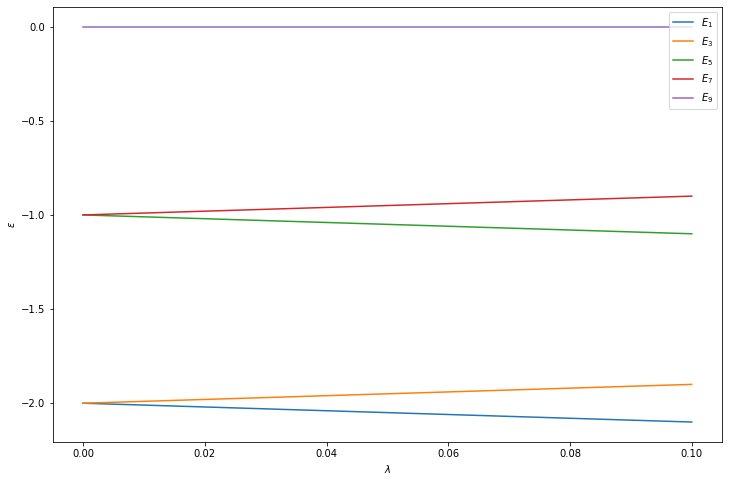

In [18]:
E0 = np.array([-2, -2, -1, -1, 0])
E1 = []
for phi in Phi0_1:
    E1.append(phi.dot(V).dot(phi.transpose()))
E1 = np.array(E1)

E = E0.copy()
L1 = np.linspace(0.0001, 0.1, num=999)
for lamb in L1:
    E = np.vstack([E, E0+lamb*E1])
E = E.transpose()

plt.figure(figsize=(12,8))
i = 1
for e in E:
    plt.plot(L, e, label='$E_{}$'.format(i))
    i+=2
plt.legend(loc='best')
plt.xlabel('$\lambda$')
plt.ylabel('$\epsilon$')
plt.savefig('FirstOrderCorrection')
plt.show()

In [19]:
E[0][-1]

-2.1

In [20]:
V

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

### The result means
The first-order perturbation theory has given the result same as the exact solution, which means the first-order correction is accurate enough to remove the degeneracy except for the ground states.

### Second order(uncomplete)

In [28]:
E2 = []
Phi0real = np.real(Phi0_1)
for i in range(0, len(E0)):
    e = 0
    for j in range(0, len(Phi0_1)):
        if j != i:
            e += Phi0real[j].dot(V).dot(Phi0real[i].transpose()).dot(Phi0real[i]).dot(V).dot(Phi0real[j])/(E0[i]-E0[j])
    E2.append(e)
E2

AttributeError: 'numpy.float64' object has no attribute 'dot'

## Non-degenerate cases
This part studies how the degeneracy of the lowest two levels is removed. Non-degenerate methods has been applied in the middle levels in previous part by renormalization of eigenvectors in a subspace. 

In [21]:
Phi0_g = np.array([[0,0,1,0,0,0,0,0,0],
                   [0,0,0,0,0,0,1,0,0]])
# try to renormalize it:
Phi0_gg = np.array([[0,0,1/np.sqrt(2),0,0,0,1/np.sqrt(2),0,0],
                    [0,0,1/np.sqrt(2),0,0,0,-1/np.sqrt(2),0,0]])

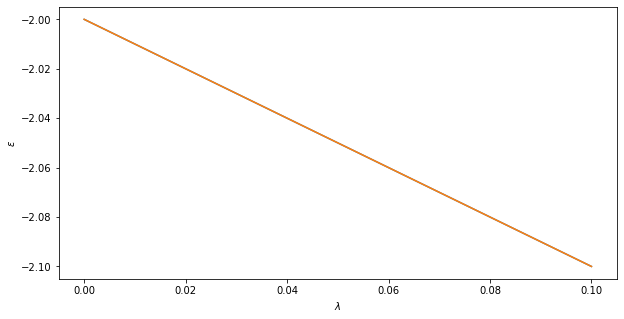

In [23]:
Eg0 = np.array([-2, -2])
Eg1 = []
for phi in Phi0_gg:
    Eg1.append(phi.dot(V).dot(phi.transpose()))
Eg1 = np.array(Eg1)

Eg = Eg0.copy()
#L1 = np.linspace(0.0001, 0.1, num=999)
for lamb in L1:
    Eg = np.vstack([Eg, Eg0+lamb*Eg1])
Eg = Eg.transpose()

plt.figure(figsize=(10,5))
for e in Eg:
    plt.plot(L, e)
#plt.legend(loc='best')
plt.xlabel('$\lambda$')
plt.ylabel('$\epsilon$')
plt.savefig('FirstOrderGroundState')
plt.show()

In [31]:
#Eg[0]==Eg[1]

These results are all 'True', which means first order perturbation is not enough to remove the degeneracy.
#### Second order

Recall that for degenerate case, we need the eigenvectors in the orthogonal subspace P:
$$ E_{nk} = E_{n}^{(0)} + \lambda V_{nk,nk} + \lambda^{2} \sum_{p} \dfrac{V_{nk,p}V_{p,nk}}{E_{n}^{(0)}-E_{p}^{(0)}} + O(\lambda^{3})$$

Eigenvectors in subspace p:

In [26]:
Phip = np.array([[0,0,0,1,0,0,0,0,0],
                 [0,0,0,0,0,1,0,0,0],
                 [0,0,0,0,0,0,0,1,0],
                 [0,1,0,0,0,0,0,0,0],
                 [0,0,0,0,1,0,0,0,0]])
Ep = [-1,-1,-1,-1,0]

In [27]:
Eg2 = []
for k in Phi0_gg:
    e = 0
    for p in range(0, len(Phip)):
        e += k.transpose().dot(V).dot(Phip[p]) * Phip[p].transpose().dot(V).dot(k)   
    Eg2.append(e/(Eg0[0]-Ep[p]) )

Eg2 = np.array(Eg2)

In [28]:
Eg2_ = Eg2.copy()
#L1 = np.linspace(0.0001, 0.1, num=999)
for lamb in L1:
    Eg2 = np.vstack([Eg2, lamb**2 *Eg2_])
Eg2 = Eg2.transpose()
E_corrected = Eg + Eg2

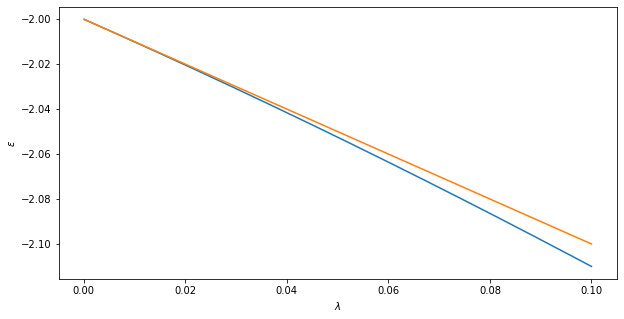

In [29]:
plt.figure(figsize=(10,5))
for e in E_corrected:
    plt.plot(L[1:], e[1:])
#plt.legend(loc='best')
plt.xlabel('$\lambda$')
plt.ylabel('$\epsilon$')
plt.savefig('SecondOrderGroundState')
plt.show()

In [43]:
E_corrected[0][-1]

-2.11

#### This result means:
The desired value is -2.109481.
The second order correction is only accurate to decimals=0.01, it needs higer order correction. I expect that the 3rd order correction would give value '+0.5'. 